In [241]:
import pandas as pd
import numpy as np
import zipfile as zf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import joblib



import warnings
warnings.filterwarnings('ignore')


In [240]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
     |█████████████████████████████▏  | 270.6 MB 129.4 MB/s eta 0:00:01

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 297.1 MB 181 bytes/s 
Note: you may need to restart the kernel to use updated packages.


In [123]:
 # extract the zip file
un_zip = zf.ZipFile('Inceptez_hackathon.zip')
un_zip.extractall()

In [125]:
# Load the data
train = pd.read_csv("train_loan_data.csv")
test = pd.read_csv("test_loan_data.csv")
sample = pd.read_csv("test_results.csv")


In [127]:
train.nunique()

addr_state                 51
annual_inc               7536
earliest_cr_line          640
emp_length                 11
emp_title               36661
fico_range_high            38
fico_range_low             38
grade                       7
home_ownership              6
application_type            2
initial_list_status         2
int_rate                  549
loan_amnt                1373
num_actv_bc_tl             28
mort_acc                   28
tot_cur_bal             65410
open_acc                   56
pub_rec                    15
pub_rec_bankruptcies        8
purpose                    14
revol_bal               32971
revol_util               1080
sub_grade                  35
term                        2
title                    5349
total_acc                 107
verification_status         3
loan_status                 2
dtype: int64

In [129]:
# check for duplicates
train.duplicated().sum(), test.duplicated().sum()

(0, 0)

In [131]:
train.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,0.0,debt_consolidation,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid
2,FL,60000.0,Aug-2007,10+ years,Marble polishing,679.0,675.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199.0,88.5,B5,36 months,Debt consolidation,16.0,Source Verified,Fully Paid
3,IL,100742.0,Sep-1980,10+ years,printer,664.0,660.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425.0,69.0,B2,36 months,Debt consolidation,19.0,Source Verified,Fully Paid
4,MD,80000.0,Jul-1999,10+ years,Southern Mgmt,669.0,665.0,F,RENT,Individual,...,0.0,debt_consolidation,34370.0,90.0,F5,60 months,Debt Connsolidation,59.0,Verified,Fully Paid


In [133]:
train.shape,test.shape,sample.shape

((80000, 28), (20000, 27), (20000, 1))

In [135]:
train.describe()

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,76052.000000,77229.000000,7.605200e+04,80000.000000,80000.000000,79969.000000,8.000000e+04,79947.000000,80000.000000
mean,7.604614e+04,699.987975,695.987813,13.232898,14403.867813,3.633790,1.674759,1.415864e+05,11.605675,0.216675,0.137103,1.628934e+04,51.899142,25.036875
std,6.902006e+04,31.734840,31.734075,4.771705,8703.826298,2.262505,2.005104,1.593714e+05,5.483362,0.579854,0.383202,2.264915e+04,24.504836,12.009194
min,0.000000e+00,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.600000e+04,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,2.964200e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,16.000000
50%,6.500000e+04,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,8.100050e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,23.000000
75%,9.000000e+04,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,2.110272e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,32.000000
max,7.141778e+06,850.000000,845.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


In [137]:
train.value_counts()

addr_state  annual_inc  earliest_cr_line  emp_length  emp_title                      fico_range_high  fico_range_low  grade  home_ownership  application_type  initial_list_status  int_rate  loan_amnt  num_actv_bc_tl  mort_acc  tot_cur_bal  open_acc  pub_rec  pub_rec_bankruptcies  purpose             revol_bal  revol_util  sub_grade  term        title                    total_acc  verification_status  loan_status
AK          20000.0     May-2001          4 years     Attendant on a school Bus      674.0            670.0           C      MORTGAGE        Individual        w                    12.39     5000.0     3.0             1.0       76470.0      6.0       1.0      1.0                   debt_consolidation  6724.0     93.4        C1          36 months  Debt consolidation       12.0       Verified             Fully Paid     1
NY          57000.0     Jul-2001          10+ years   Courier                        664.0            660.0           F      MORTGAGE        Individual        f   

In [138]:
#checking null values
train.isna().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [140]:
# EDA - Univariate analysis


In [141]:
#combine dataset
#data = pd.concat([train,test])
#train.shape,test.shape,data.shape
data = train

In [143]:
cat_cols = data.drop(columns='loan_status').select_dtypes(include=object).columns
num_cols = data.drop(columns='loan_status').select_dtypes(include=np.number).columns
print(cat_cols, num_cols)

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status'],
      dtype='object') Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object')


In [147]:
data['emp_length'].unique()

array(['10+ years', nan, '3 years', '< 1 year', '1 year', '8 years',
       '7 years', '4 years', '2 years', '5 years', '6 years', '9 years'],
      dtype=object)

In [149]:
data['emp_length'].replace({'10+ years':10,'3 years':3,'< 1 year':1.5,'1 year':'1', '8 years':'8', '7 years':'7','4 years':4,'2 years':'2', '5 years':'5','6 years':'6','9 years':'9'}, inplace = True)

In [151]:
data['emp_length'] = pd.to_numeric(data['emp_length'], errors='coerce')

In [153]:
data['emp_length'].mean()

6.090390123587758

In [155]:
data['emp_length'].fillna(data['emp_length'].mean(), inplace = True)

In [157]:
data['emp_title'].fillna(data['emp_title'].mode()[0], inplace = True)


In [159]:
data['num_actv_bc_tl'].unique()

array([ 1.,  4., 14., nan,  2.,  3.,  6.,  5.,  8.,  0.,  9.,  7., 11.,
       10., 17., 13., 12., 19., 25., 16., 15., 20., 18., 24., 21., 22.,
       26., 27., 32.])

In [161]:
data['num_actv_bc_tl'].fillna(data['num_actv_bc_tl'].mean(), inplace = True)

In [163]:
data['mort_acc'].unique()

array([ 1.,  0.,  2.,  7.,  4., nan,  3.,  5.,  8., 12.,  9.,  6., 10.,
       11., 13., 16., 14., 26., 18., 15., 32., 22., 19., 20., 27., 31.,
       17., 24., 29.])

In [165]:
data['mort_acc'].fillna(data['mort_acc'].mean(), inplace = True)

In [167]:
data['tot_cur_bal'].isna().sum()
data['tot_cur_bal'].fillna(0, inplace = True)

In [169]:

data['pub_rec_bankruptcies'].fillna(0, inplace = True)

In [171]:

data['revol_util'].fillna(data['revol_util'].mean(), inplace = True)

In [173]:
data['title'].fillna(data['title'].mode()[0], inplace = True)


In [175]:
data.isna().sum()

addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
emp_title               0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
title                   0
total_acc               0
verification_status     0
loan_status             0
dtype: int64

In [177]:
# This columns has more unique values, so removing from the data set.
data = data.drop(columns=['emp_title', 'title'])


In [178]:
data['earliest_cr_line_year'], data['earliest_cr_line_month'] = pd.DatetimeIndex(data['earliest_cr_line']).year, pd.DatetimeIndex(data['earliest_cr_line']).month
data = data.drop(columns = 'earliest_cr_line')

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

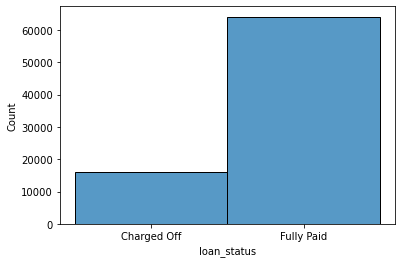

In [181]:
sns.histplot(data['loan_status'])


annual_inc


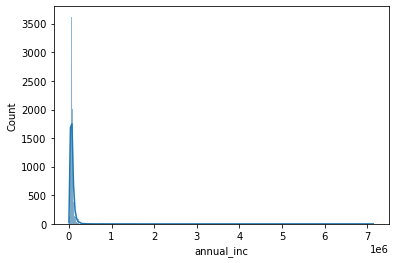

emp_length


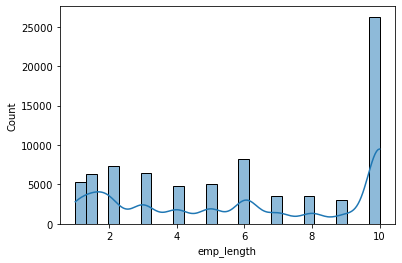

fico_range_high


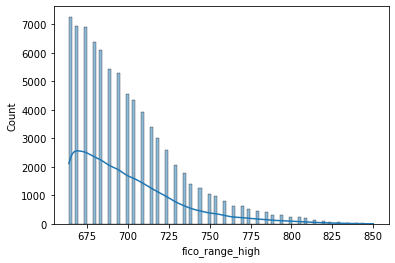

fico_range_low


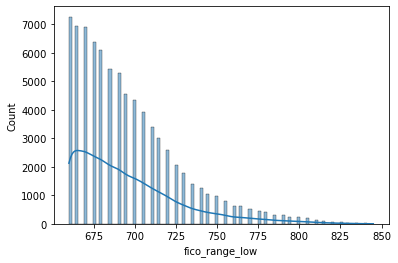

int_rate


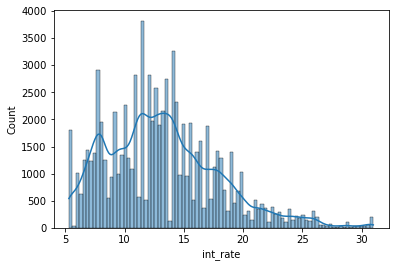

loan_amnt


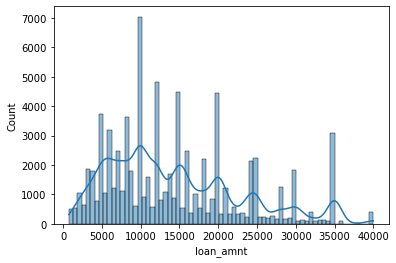

num_actv_bc_tl


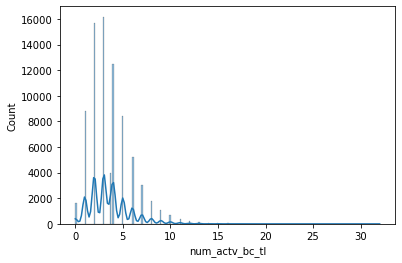

mort_acc


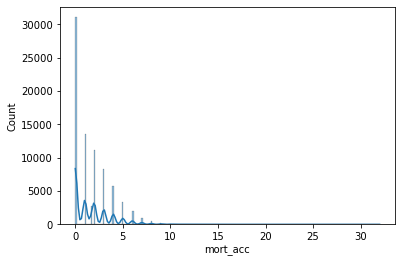

tot_cur_bal


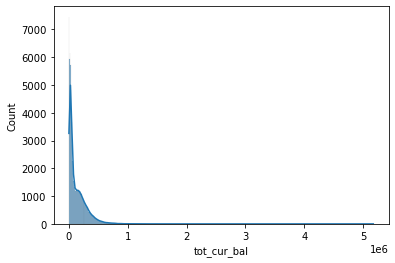

open_acc


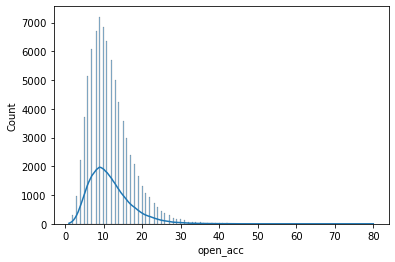

pub_rec


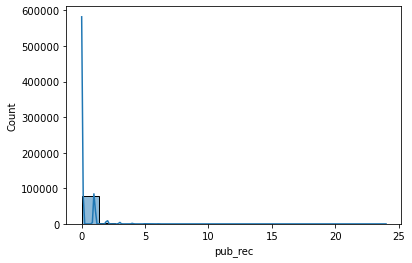

pub_rec_bankruptcies


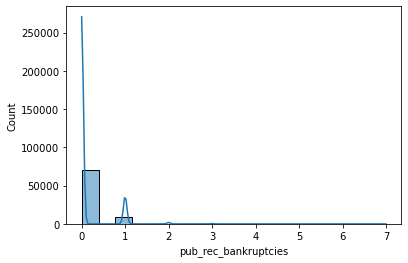

revol_bal


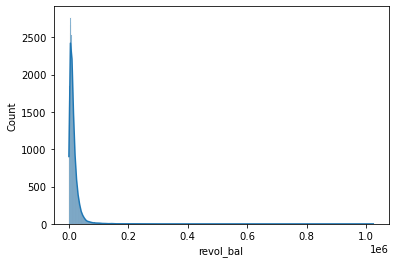

revol_util


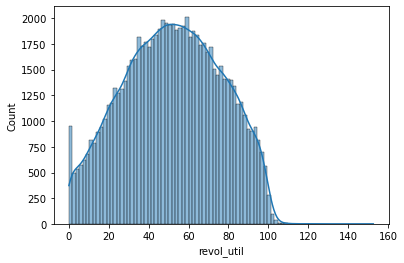

total_acc


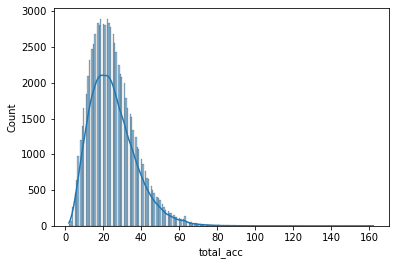

earliest_cr_line_year


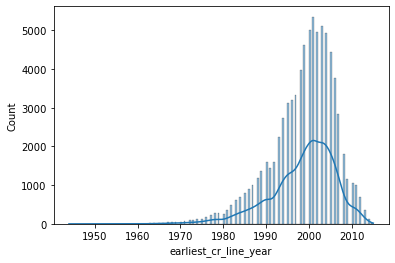

earliest_cr_line_month


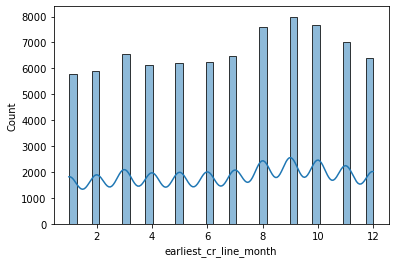

In [182]:
for col in data.select_dtypes(include=np.number).columns:
    print(col)
    sns.histplot(data[col], kde=True)
    plt.show()


In [183]:
#  Bivaraiate Analysis

In [ ]:
sns.pairplot(data)


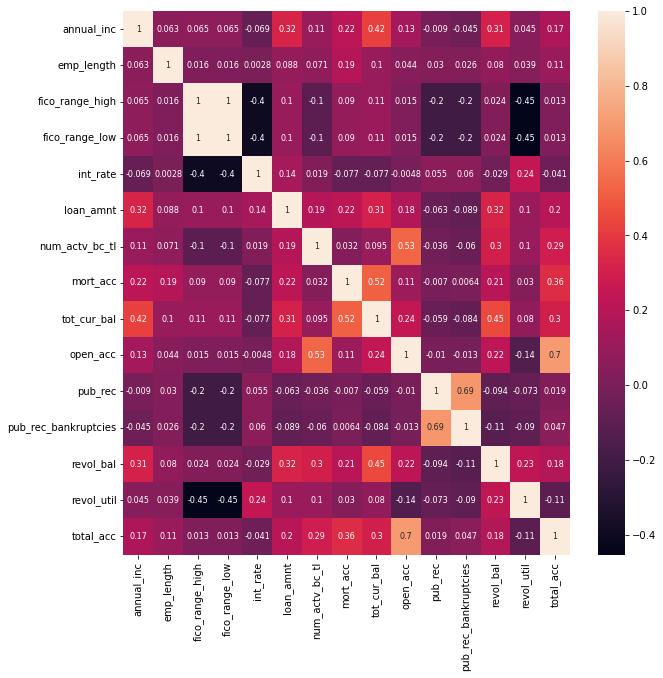

In [189]:
plt.figure(figsize = (10,10),)
sns.heatmap(train.corr(),annot = True, annot_kws = {'size':8})
plt.show()


In [190]:

data['loan_status'] = data['loan_status'].replace({'Fully Paid':0, 'Charged Off':1}).astype(int)
data['loan_status'].value_counts(dropna=False)

0    64030
1    15970
Name: loan_status, dtype: int64

<AxesSubplot:ylabel='loan_status'>

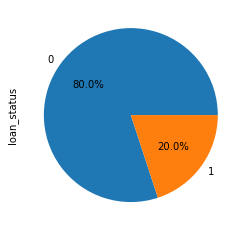

In [191]:
data['loan_status'].value_counts().plot.pie(autopct='%1.1f%%')

In [192]:
# pipeline method
cat_encode = Pipeline(steps=[('in', OneHotEncoder(handle_unknown='ignore'))])
num_encode = Pipeline(steps=[('cep', StandardScaler())])
cat_encode, num_encode

(Pipeline(steps=[('in', OneHotEncoder(handle_unknown='ignore'))]),
 Pipeline(steps=[('cep', StandardScaler())]))

In [193]:
all_col_link = ColumnTransformer(transformers=[
    ('categorical',cat_encode,cat_cols),
    ('numerical',num_encode,num_cols),
])
all_col_link

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('in',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status'],
      dtype='object')),
                                ('numerical',
                                 Pipeline(steps=[('cep', StandardScaler())]),
                                 Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object'))])

In [202]:
pipe = Pipeline(steps=[
    ('preprocessing',all_col_link)
])
pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('in',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status'],
      dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('cep',
                                                                   StandardScaler())]),
                                                  Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
     

In [204]:
pipe_mdl = Pipeline([
 ('preprocess', all_col_link),
 ('model',LogisticRegression())
])
pipe_mdl

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('in',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status'],
      dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('cep',
                                                                   StandardScaler())]),
                                                  Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       '

In [206]:
X = train.drop(columns='loan_status')
y= train[['loan_status']]

In [208]:
# splitting the data into train and validation with 80-20%
train_X, val_X, train_y, val_y = train_test_split(X,y,test_size=0.2, random_state=42)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((64000, 27), (16000, 27), (64000, 1), (16000, 1))

In [210]:
# Fittinfg the model and also doing prediction
pipe_mdl.fit(train_X,train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('in',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status'],
      dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('cep',
                                                                   StandardScaler())]),
                                                  Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       '

In [212]:
# checkind the results

In [214]:
pred_val_y = pipe_mdl.predict(val_X)


In [216]:
print('Vald confusion_matrix:\n', confusion_matrix(val_y,pred_val_y))


Vald confusion_matrix:
 [[  318  2796]
 [  366 12520]]


In [218]:
print('val classification_rep:\n', classification_report(val_y,pred_val_y))

val classification_rep:
               precision    recall  f1-score   support

 Charged Off       0.46      0.10      0.17      3114
  Fully Paid       0.82      0.97      0.89     12886

    accuracy                           0.80     16000
   macro avg       0.64      0.54      0.53     16000
weighted avg       0.75      0.80      0.75     16000



In [220]:
data.head()

,addr_state,annual_inc,emp_length,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,...,purpose,revol_bal,revol_util,sub_grade,term,total_acc,verification_status,loan_status,earliest_cr_line_year,earliest_cr_line_month
0,CO,85000.0,10.0,744.0,740.0,E,MORTGAGE,Individual,w,18.99,...,debt_consolidation,5338.0,93.6,E1,60 months,8.0,Source Verified,1,1997,7
1,CA,40000.0,10.0,724.0,720.0,B,RENT,Individual,w,10.16,...,debt_consolidation,19944.0,60.3,B1,36 months,12.0,Verified,0,1987,4
2,FL,60000.0,10.0,679.0,675.0,B,MORTGAGE,Individual,w,11.47,...,debt_consolidation,23199.0,88.5,B5,36 months,16.0,Source Verified,0,2007,8
3,IL,100742.0,10.0,664.0,660.0,B,MORTGAGE,Individual,w,9.16,...,debt_consolidation,18425.0,69.0,B2,36 months,19.0,Source Verified,0,1980,9
4,MD,80000.0,10.0,669.0,665.0,F,RENT,Individual,f,23.83,...,debt_consolidation,34370.0,90.0,F5,60 months,59.0,Verified,0,1999,7


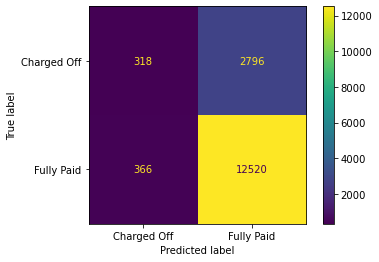

In [222]:
#Displaying in chart grid
ConfusionMatrixDisplay.from_predictions(val_y,pred_val_y)


In [224]:
#Multi model pipeline

pipe_lr = Pipeline([
    ('preprocess',all_col_link),
    ('lr',LogisticRegression())
])

pipe_dt = Pipeline([
    ('preprocess',all_col_link),
    ('dt',DecisionTreeClassifier())
])

pipe_knn = Pipeline([
    ('preprocess',all_col_link),
    ('knn',KNeighborsClassifier())
])

pipe_rf = Pipeline([
    ('preprocess',all_col_link),
    ('rf',RandomForestClassifier())
])


In [226]:
grid_param_lr = [{'lr__penalty':['l2']}]
grid_param_knn = [{'knn__n_neighbors':[10,15]}]
grid_param_dt = [{'dt__max_depth':[5,10]}]
grid_param_rf = [{'rf__max_depth':[5,10]}]


In [228]:
# GridSearchCV
gridsrc_lr = GridSearchCV(pipe_lr, param_grid=grid_param_lr, scoring='neg_log_loss', cv=2)
gridsrc_knn = GridSearchCV(pipe_knn, param_grid=grid_param_knn, scoring='neg_log_loss', cv=2)
gridsrc_dt = GridSearchCV(pipe_dt, param_grid=grid_param_dt, scoring='neg_log_loss', cv=2)
gridsrc_rf = GridSearchCV(pipe_rf, param_grid=grid_param_rf, scoring='neg_log_loss', cv=2)


In [230]:


# run through models
result_acc = {}
models = []
iter_mdl = [gridsrc_lr,  gridsrc_knn, gridsrc_dt, gridsrc_rf]
mdl_idx = {0:'Log_reg', 1:'Knn', 2:'DecisionTree', 3:'RandomForest'}

In [232]:
for id, model in enumerate(iter_mdl):
  model.fit(train_X, train_y)
  print(model.best_params_)
  print(model.best_score_)

  models.append(model.best_estimator_)
  result_acc[id] = model.best_score_

{'lr__penalty': 'l2'}
-0.47355269421637375
{'knn__n_neighbors': 15}
-0.7892804215102154
{'dt__max_depth': 5}
-0.472441556699587
{'rf__max_depth': 10}
-0.48490764800957026


In [266]:
pd.DataFrame(list(zip(mdl_idx.values(), result_acc.values())), columns=['Model','Accuracy'])

,Model,Accuracy
0,Log_reg,-0.473553
1,Knn,-0.789280
2,DecisionTree,-0.472442
3,RandomForest,-0.484908
